<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/3_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
df = pd.read_csv('WEAT ETF Stock Price History.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [3]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,5.97,5.99,5.998,5.92,584.92K,-0.50%
2023-12-28,6.00,5.94,6.030,5.94,634.94K,1.18%
2023-12-27,5.93,5.97,5.990,5.91,764.65K,-1.66%
2023-12-26,6.03,5.86,6.060,5.83,1.06M,2.90%
2023-12-22,5.86,5.85,5.899,5.85,606.12K,0.17%


In [4]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-28,13.74,14.01,14.01,13.70,6.46K,-0.79%
2014-01-27,13.85,14.19,14.19,13.63,32.25K,-0.86%
2014-01-24,13.97,14.03,14.03,13.80,48.43K,-0.92%
2014-01-23,14.10,14.68,14.68,14.02,26.31K,1.37%
2014-01-22,13.91,13.95,13.96,13.81,2.04K,-0.14%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2528 entries, 2023-12-29 to 2014-01-22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2528 non-null   float64
 1   Open      2528 non-null   float64
 2   High      2528 non-null   float64
 3   Low       2528 non-null   float64
 4   Vol.      2503 non-null   object 
 5   Change %  2528 non-null   object 
dtypes: float64(4), object(2)
memory usage: 138.2+ KB


In [6]:
df.shape

(2528, 6)

In [7]:
df.describe()

,Price,Open,High,Low
count,2528.000000,2528.000000,2528.000000,2528.000000
mean,7.845369,7.851388,7.926894,7.764583
std,2.561897,2.568559,2.602286,2.522623
min,4.860000,4.880000,4.960000,4.830000
25%,6.030000,6.047500,6.080000,5.990000
50%,6.980000,6.970000,7.050000,6.910000
75%,9.012500,9.022500,9.100000,8.920250
max,17.470000,17.430000,17.550000,17.180000


In [8]:
df.nunique()

Price        777
Open         774
High         874
Low          846
Vol.        2352
Change %     681
dtype: int64

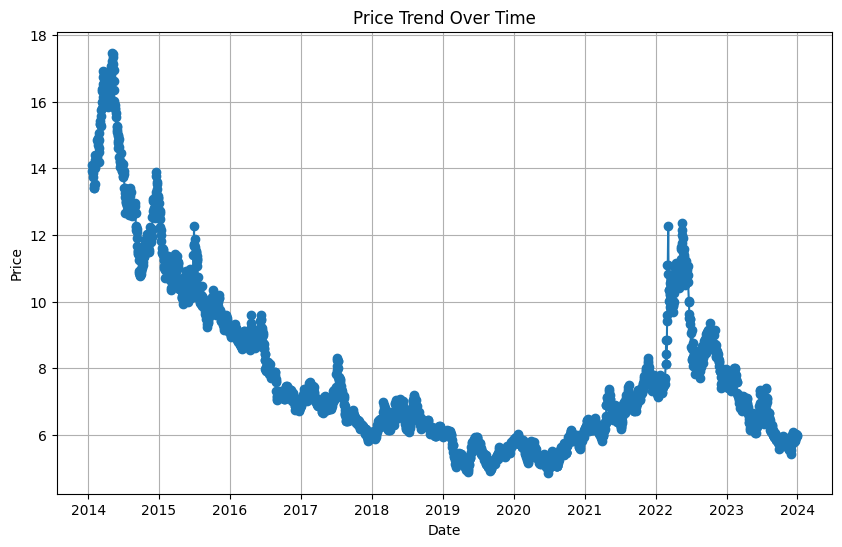

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], marker='o', linestyle='-')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

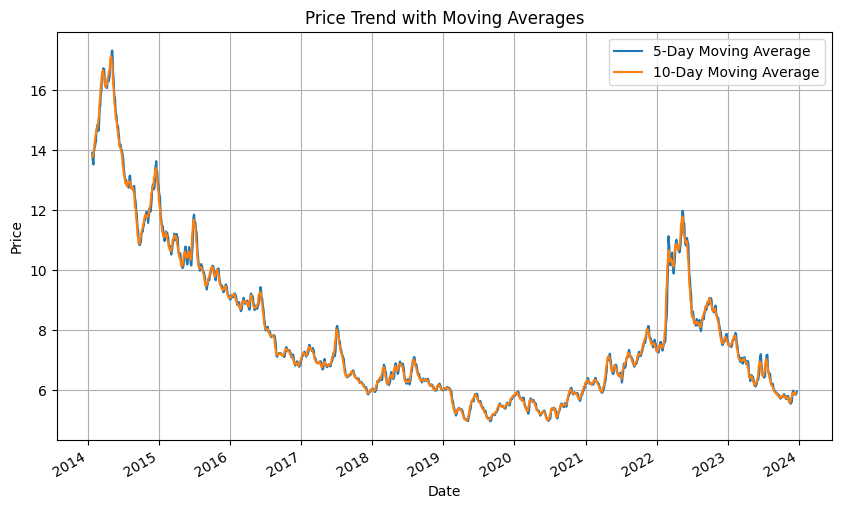

In [10]:
plt.figure(figsize=(10, 6))
df['Price'].rolling(window=5).mean().plot(label='5-Day Moving Average')
df['Price'].rolling(window=10).mean().plot(label='10-Day Moving Average')
plt.title('Price Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

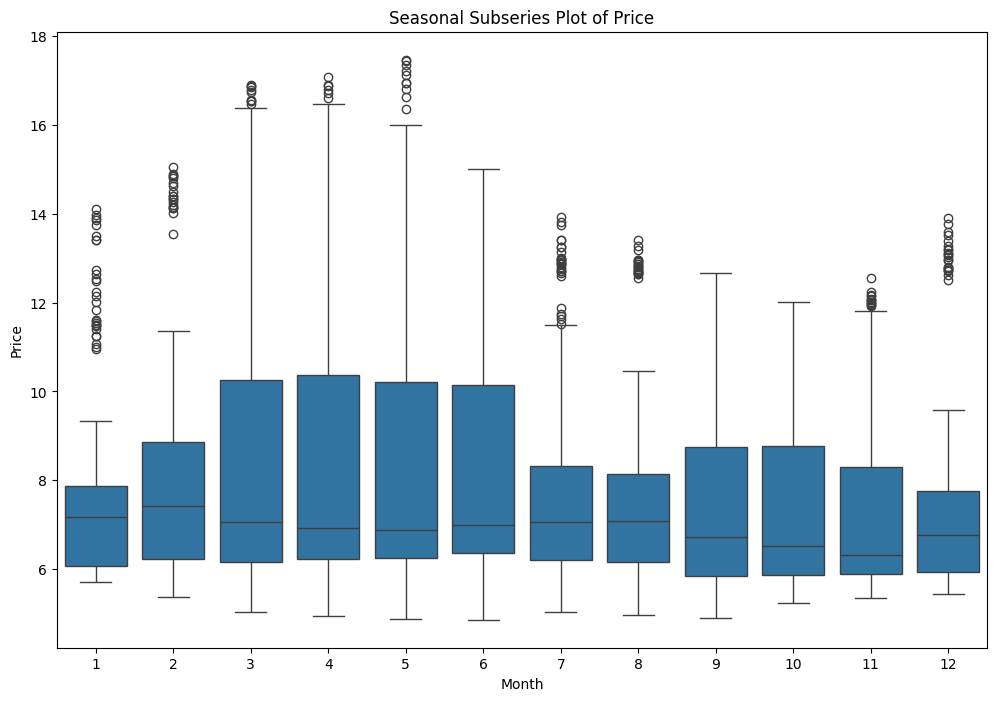

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.month, y=df['Price'])
plt.title('Seasonal Subseries Plot of Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [12]:
df.index

DatetimeIndex(['2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
               '2023-12-22', '2023-12-21', '2023-12-20', '2023-12-19',
               '2023-12-18', '2023-12-15',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=2528, freq=None)

In [13]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [14]:
# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1,1))

In [15]:
# Replace any missing or NaN values in the 'Vol.' column with '0'
df['Vol.'] = df['Vol.'].fillna('0')

In [16]:
# Convert the 'Vol.' column to numeric data
df['Vol.'] = df['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [17]:
# Convert the 'Change %' column to numeric data
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

In [18]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,5.97,5.99,5.998,5.92,584920,-0.50
2023-12-28,6.00,5.94,6.030,5.94,634940,1.18
2023-12-27,5.93,5.97,5.990,5.91,764650,-1.66
2023-12-26,6.03,5.86,6.060,5.83,1060000,2.90
2023-12-22,5.86,5.85,5.899,5.85,606120,0.17


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2528 entries, 2023-12-29 to 2014-01-22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2528 non-null   float64
 1   Open      2528 non-null   float64
 2   High      2528 non-null   float64
 3   Low       2528 non-null   float64
 4   Vol.      2528 non-null   int64  
 5   Change %  2528 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 138.2 KB


In [20]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [21]:
# Define sequence length and split data into train and test sets
sequence_length = 30
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [22]:
# Create sequences for LSTM
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
63/63 [==============================] - 12s 30ms/step - loss: 0.0023
Epoch 2/10
63/63 [==============================] - 3s 47ms/step - loss: 5.5844e-04
Epoch 3/10
63/63 [==============================] - 2s 31ms/step - loss: 4.5009e-04
Epoch 4/10
63/63 [==============================] - 2s 30ms/step - loss: 4.0753e-04
Epoch 5/10
63/63 [==============================] - 2s 30ms/step - loss: 3.6886e-04
Epoch 6/10
63/63 [==============================] - 2s 31ms/step - loss: 3.6381e-04
Epoch 7/10
63/63 [==============================] - 2s 30ms/step - loss: 3.3951e-04
Epoch 8/10
63/63 [==============================] - 3s 43ms/step - loss: 3.0710e-04
Epoch 9/10
63/63 [==============================] - 2s 36ms/step - loss: 2.8793e-04
Epoch 10/10
63/63 [==============================] - 2s 31ms/step - loss: 2.7414e-04


In [25]:
# Make predictions
predictions = model.predict(X_test)

15/15 [==============================] - 1s 11ms/step


In [26]:
# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions)

In [27]:
# Evaluate the model
mse = mean_squared_error(df['Price'].values[-len(predictions):], predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.1027020018012204


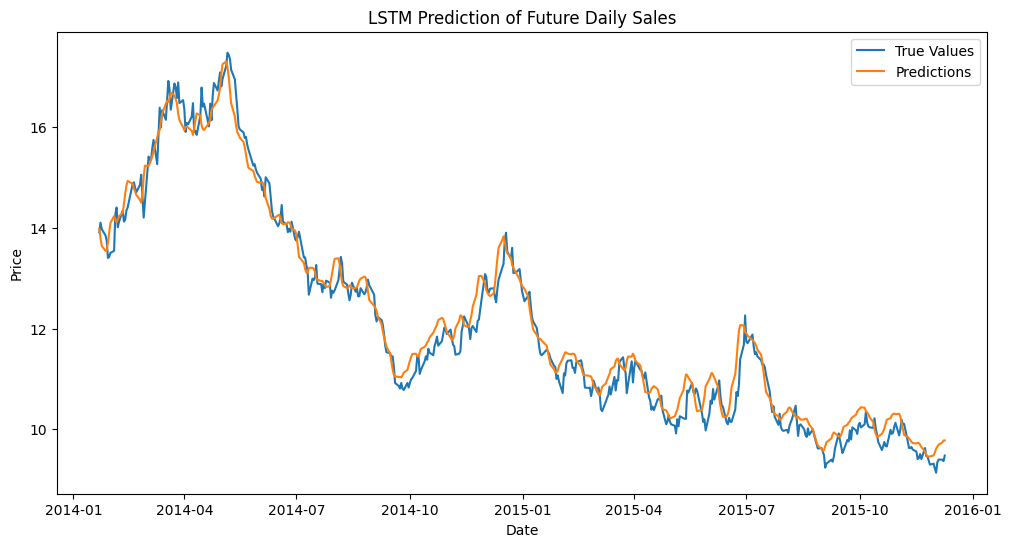

In [28]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predictions):], df['Price'].values[-len(predictions):], label='True Values')
plt.plot(df.index[-len(predictions):], predictions, label='Predictions')
plt.title('LSTM Prediction of Future Daily Sales')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()